# Labo 3 : Imputation de données manquantes
Auteurs : Julien Mülhemann et Cristhian Ronquillo

## Résumé :
L’objectif est d’appliquer plusieurs méthodes d’imputation à un jeu de données, examiner leur effet
sur les performances de prédiction d’une colonne, et discuter les résultats dans un court rapport, par
exemple des cellules markdown d’un notebook Jupyter.


> Chargez les données du fichier `employee-earnings-report-2021.csv` dans un DataFrame pandas. Ces données contiennent des informations sur les employés de la ville de Boston, y compris leur salaire.

In [224]:
import pandas as pd
df = pd.read_csv('data/employee-earnings-report-2021.csv', encoding='latin-1')

Exploration des données :

In [225]:
df.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS,POSTAL
0,"Beckers,Richard",Boston Police Department,Police Officer,NaN,NaN,"1,264,843.63",NaN,NaN,NaN,NaN,"1,264,843.63",02119
1,"McGowan,Jacqueline M.",Boston Police Department,Police Officer,NaN,NaN,"1,252,990.81",NaN,NaN,NaN,NaN,"1,252,990.81",02129
2,"Harris,Shawn N",Boston Police Department,Police Offc Comm Serv Offc 3$8,"69,772.10",NaN,"212,739.48","82,300.87","30,939.24","12,144.00","25,178.06","433,073.75",02130
3,"Washington,Walter",Boston Police Department,Police Officer,"100,963.38",NaN,"211,900.28","67,849.66",NaN,"9,016.00","10,096.55","399,825.87",02368
4,"Mosley Jr.,Curtis",Boston Police Department,Police Offc Comm Serv Offc 3$8,"109,858.02",NaN,"192,097.54","75,938.65",NaN,"19,550.00",NaN,"397,444.21",02301


> Combien de lignes et de colonnes a le Data Frame ? 

In [226]:
df.info()
# df.shape fonctionne aussi. output : (22544, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   NAME                       22546 non-null  object
 1   DEPARTMENT_NAME            22546 non-null  object
 2   TITLE                      22546 non-null  object
 3   REGULAR                    21908 non-null  object
 4   RETRO                      402 non-null    object
 5   OTHER                      14129 non-null  object
 6   OVERTIME                   6846 non-null   object
 7   INJURED                    1456 non-null   object
 8   DETAIL                     2059 non-null   object
 9   QUINN_EDUCATION_INCENTIVE  1386 non-null   object
 10  TOTAL_GROSS                22546 non-null  object
 11  POSTAL                     22546 non-null  object
dtypes: object(12)
memory usage: 2.1+ MB


Nous avons 12 colonnes et 22'552 lignes.

>Pour chaque colonne, combien y a-t-il de données manquantes ?

In [227]:
print(df.isnull().sum())

NAME                             6
DEPARTMENT_NAME                  6
TITLE                            6
REGULAR                        644
RETRO                        22150
OTHER                         8423
OVERTIME                     15706
INJURED                      21096
DETAIL                       20493
QUINN_EDUCATION_INCENTIVE    21166
TOTAL_GROSS                      6
POSTAL                           6
dtype: int64


>Y a-t-il des lignes entièrement vides ?

In [228]:
print(df.isnull().all(axis=1).sum())

6


Oui, il y en a 6 lignes entièrement vides.

>Supprission des lignes entièrement vides

In [229]:
df = df.dropna(how='all')

In [230]:
df.shape

(22546, 12)

Commme nous pouvons le voir, nous avons supprimé 6 ligne et donc nous avons maintenant 22'546 lignes de 22'552 de base.

>Veuillez convertir les colonnes qui représentent des nombres dans un type numérique Python

In [231]:
col = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL',
       'QUINN_EDUCATION_INCENTIVE', 'TOTAL_GROSS', 'POSTAL']
# on remplace les , ' ou tout les trucs qui perturbent la convertion en float python.
df[col] = df[col].replace({',': '', "'": ''}, regex=True)

# on applique la converton en float
df[col] = df[col].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22546 entries, 0 to 22545
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NAME                       22546 non-null  object 
 1   DEPARTMENT_NAME            22546 non-null  object 
 2   TITLE                      22546 non-null  object 
 3   REGULAR                    21908 non-null  float64
 4   RETRO                      402 non-null    float64
 5   OTHER                      14129 non-null  float64
 6   OVERTIME                   6846 non-null   float64
 7   INJURED                    1456 non-null   float64
 8   DETAIL                     2059 non-null   float64
 9   QUINN_EDUCATION_INCENTIVE  1386 non-null   float64
 10  TOTAL_GROSS                22546 non-null  float64
 11  POSTAL                     22542 non-null  float64
dtypes: float64(9), object(3)
memory usage: 2.2+ MB


Nous avons converti les colonnes suivantes en type numérique : `REGULAR`, `RETRO`, `OTHER`, `OVERTIME`, `INJURED`, `DETAIL`, `QUINN_EDUCATION_INCENTIVE`, `TOTAL_GROSS` et `POSTAL`.  Il est important de noter que la colonne POSTAL a été convertie en type numérique pour simplifier les processus, bien qu'elle devrait normalement être traitée comme une chaîne de caractères. Étant donné que les codes postaux sont uniquement composés de chiffres, il est techniquement possible de les manipuler comme des nombres.

> Cherchez des données aberrantes (outliers) par une méthode univariée simple, à votre choix. Si nécessaire, vous pouvez encore supprimer jusqu’à 6 personnes.

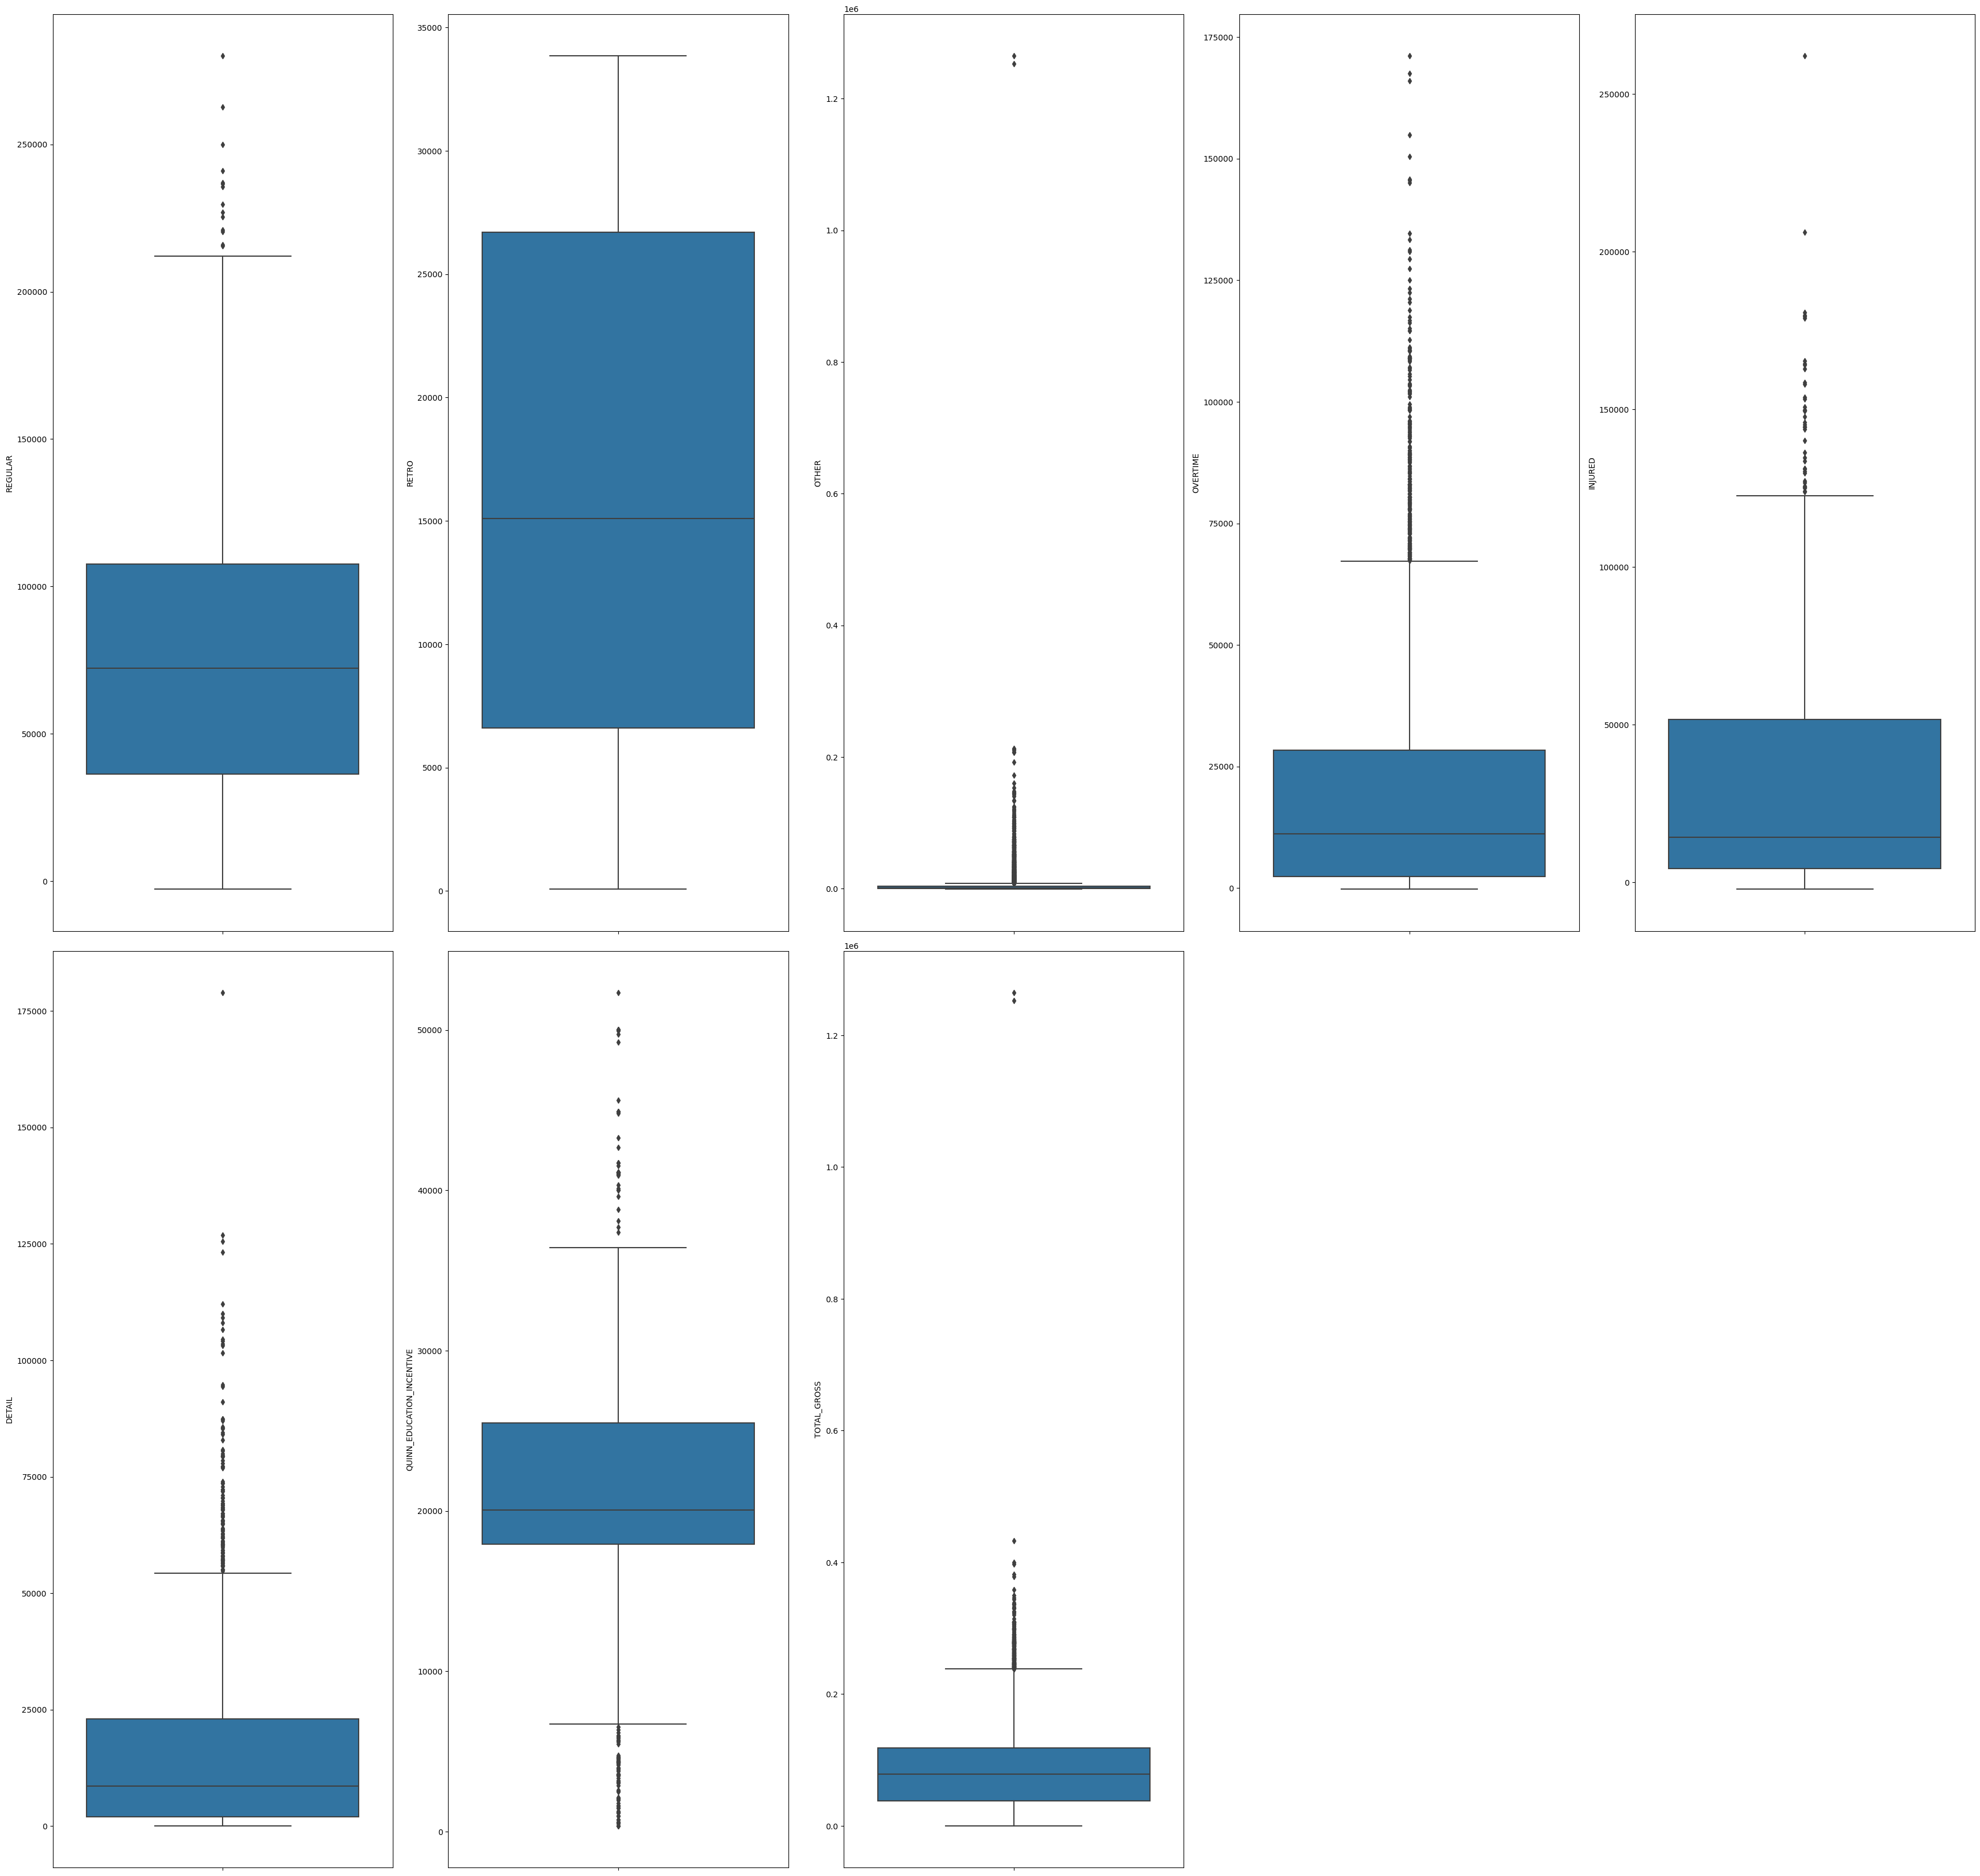

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
# on afficher les boxplots des features numériques pour observer à quoi cela ressemble
col = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION_INCENTIVE', 'TOTAL_GROSS']

fig, axs = plt.subplots(2, 5, figsize=(35, 35))
axs = axs.flatten()
for i, col in enumerate(col):
    sns.boxplot(y=df[col], data=df, ax=axs[i])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
fig.delaxes(axs[-1])
fig.delaxes(axs[-2])
plt.show()


la recherche des données aberrantes a été effectuée en utilisant la méthode de la boîte à moustaches. Nous avons trouvé des valeurs aberrantes dans les colonnes `REGULAR`, `OTHER`, `OVERTIME`, `INJURED`, `DETAIL`, `QUINN_EDUCATION_INCENTIVE` et `TOTAL_GROSS`. Vu que pour presque toutes les colonnes, les valeurs aberrantes sont très nombreuses, nous avons décidé de ne pas les supprimer parce que cela pourrait affecter la qualité des données et nous sommes pas sûr si ces valeurs sont vraiment des erreurs.  

Cependant, nous avons observé que la colonne OTHER inclut des valeurs extrêmement élevées, susceptibles de correspondre à des événements exceptionnels. Par conséquent, nous avons opté pour l'élimination des valeurs supérieures à 1 000 000. Ces occurrences exceptionnelles sont attribuables à une compensation spéciale octroyée dans le cadre d'une affaire de drogue en 2021 à deux agents de police.

In [233]:
# on supprime les 2 outliers qui dépassent 1'000'000 de dollars de salaire
df = df[df['TOTAL_GROSS'] < 1000000]

In [234]:
# Vérifions que les outliers ont bien été supprimés grâce à shape qui nous donne le nombre de lignes et de colonnes.
df.shape

(22544, 12)

> Nous allons révisualiser les données pour voir si les 2 valeurs aberrantes supprimées aideront à améliorer la visualisation.

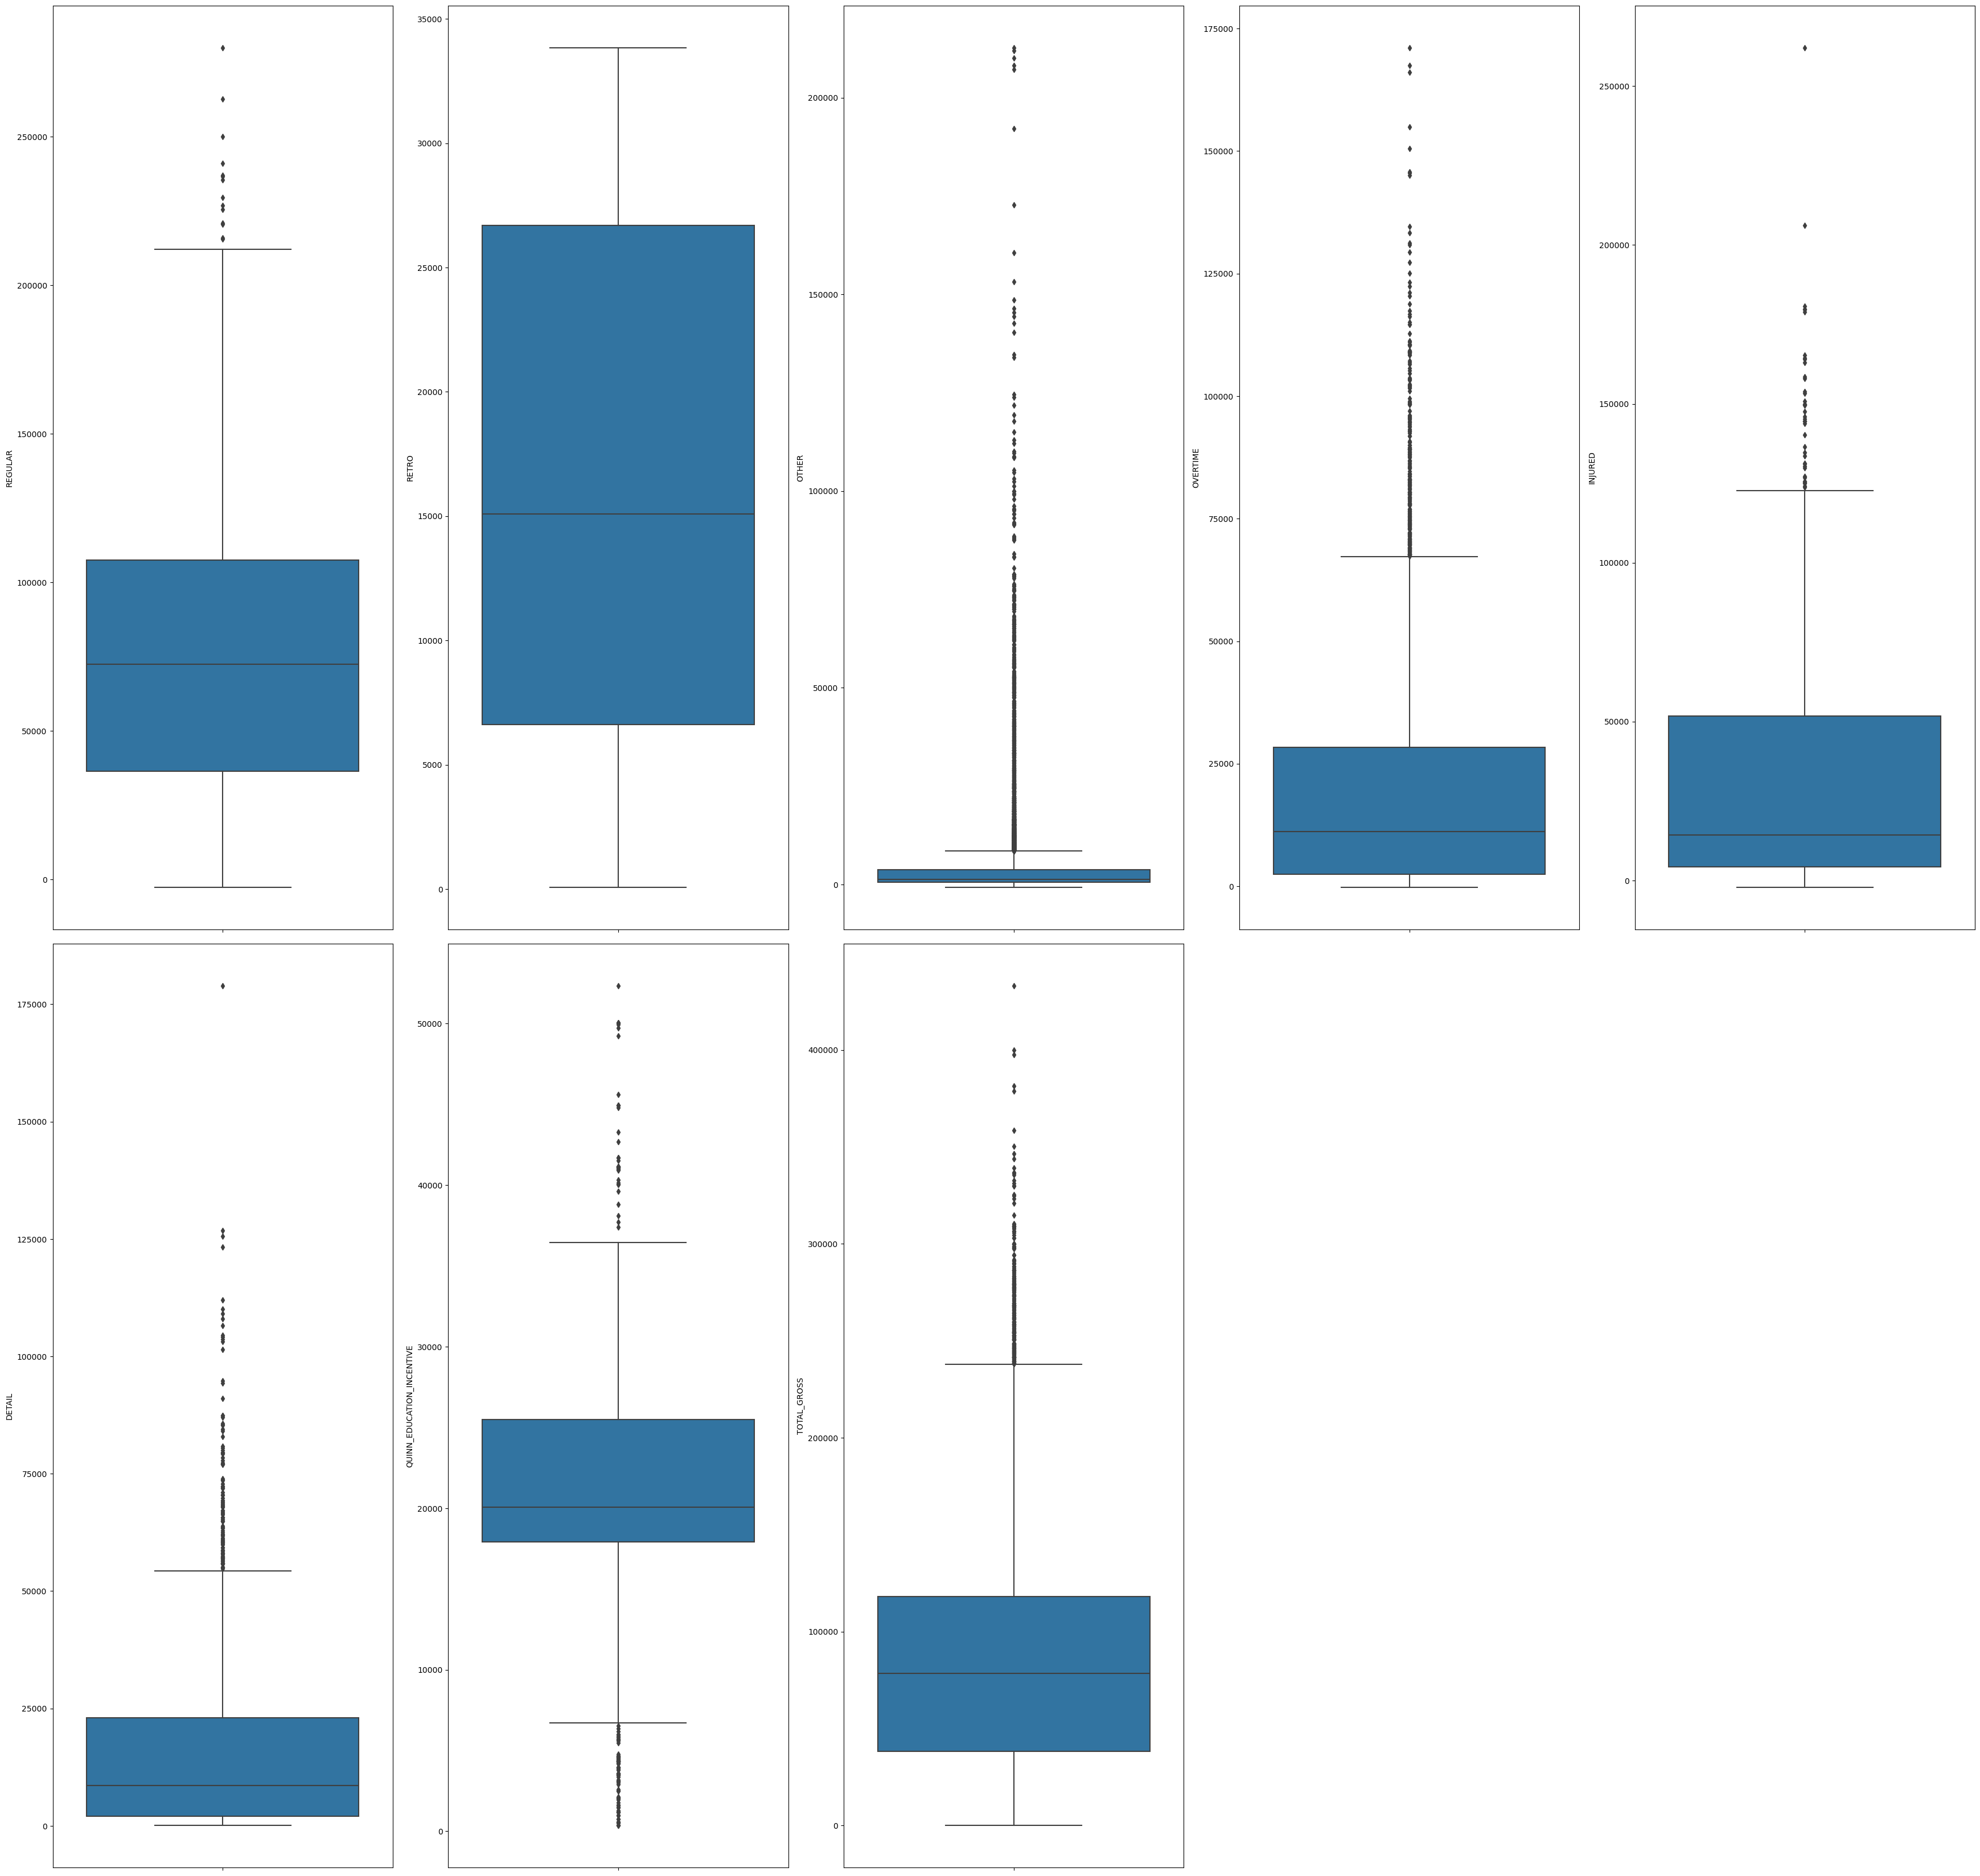

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt
# on afficher les boxplots des features numériques pour observer à quoi cela ressemble
col = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION_INCENTIVE', 'TOTAL_GROSS']

fig, axs = plt.subplots(2, 5, figsize=(35, 35))
axs = axs.flatten()
for i, col in enumerate(col):
    sns.boxplot(y=df[col], data=df, ax=axs[i])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
fig.delaxes(axs[-1])
fig.delaxes(axs[-2])
plt.show()


L'élimination de deux valeurs aberrantes a entraîné une légère amélioration de la visualisation des données pour les colonnes TOTAL_GROSS et OTHER. Toutefois, compte tenu du nombre important de valeurs aberrantes qui subsistent, l'ampleur de cette amélioration demeure limitée.

> La tâche de prédiction est la suivante : pour chaque personne, prédire l’attribut
‘DEPARTMENT_NAME’ uniquement à partir des informations sur les salaires et les primes (valeurs
numériques). Veuillez donc supprimer les colonnes non pertinentes.

In [236]:
# Séèaration des données en features et label
df_train = df.drop(['NAME', 'TITLE', 'DEPARTMENT_NAME', 'POSTAL'], axis=1)
df_label = df['DEPARTMENT_NAME']

Nous allons supprimer les colonnes suivantes : `NAME`, `TITLE`, `DEPARTMENT_NAME`, `POSTAL` pour l'entrainement du modèle. Ces colonnes ne sont pas pertinentes pour la prédiction de la colonne `DEPARTMENT_NAME`. 

> Existe-t-il des classifieurs dans Scikit-learn qui acceptent des données manquantes ?

Traditionnellement, la plupart des algorithmes de machine learning, y compris ceux implémentés dans Scikit-learn, exigent que les données soient complètes et ne gèrent pas directement les données manquantes dans leurs entrées. Cela signifie que vous devez généralement imputer les valeurs manquantes (c'est-à-dire, les remplacer par des valeurs estimées) ou les supprimer avant de fournir les données à un modèle d'apprentissage automatique.  

Cependant, il existe quelques exceptions notables dans Scikit-learn qui peuvent gérer directement les données manquantes dans certaines de leurs implémentations. Par exemple : `DecisionTreeClassifier` et `DecisionTreeRegressor`.

Documetation : https://scikit-learn.org/stable/modules/tree.html#tree-missing-value-support.  

***Extraits de la documentation :***
### 1.10.8. Missing Values Support

DecisionTreeClassifier and DecisionTreeRegressor have built-in support for missing values when splitter='best' and criterion is 'gini', 'entropy’, or 'log_loss', for classification or 'squared_error', 'friedman_mse', or 'poisson' for regression.

For each potential threshold on the non-missing data, the splitter will evaluate the split with all the missing values going to the left node or the right node.

> Test de quatre méthodes d’imputation différentes (par zéro, par la médiane, ‘KNN’ et ‘iterative’) et trois classifieurs différents (k plus proches voisins (KNN), arbre de décision (Decision Tree), et forêt d’arbres de décision (Random Forest).

In [237]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Séparer en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df_train, df_label, test_size=0.1, random_state=42)


> Si on attribue à tous les items la classe majoritaire, quel score F1 avec micro-moyenne
obtient-on ? 

Calcul du score F1 avec micro-moyenne pour la prédiction de la classe majoritaire grâce à DummyClassifier et la fonction f1_score de Scikit-learn. Le score F1 avec micro-moyenne.

In [238]:
# Score F1 avec classe majoritaire
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)
f1_score_majority_class = f1_score(y_test, y_pred_dummy, average='micro')
print("Réponse à la question b. :")
print(f"F1 score with majority class: {f1_score_majority_class}")

Réponse à la question b. :
F1 score with majority class: 0.13880266075388026


In [239]:
# Nous allons regarder les nombres d'occurences de chaque classe
# Calculer les occurrences de chaque classe
value_counts_train = y_train.value_counts()
value_counts_test = y_test.value_counts()

# Trouver la classe avec le nombre maximal d'occurrences
class_name_train = value_counts_train.idxmax()
max_occurences_train = value_counts_train[class_name_train]

class_name_test = value_counts_test.idxmax()
max_occurences_test = value_counts_test[class_name_test]

# Afficher le nom de la classe majoritaire et son nombre d'occurrences
print(f"Le nombre d'occurences pour la classe majoritaire '{class_name_train}' dans le train set est : {max_occurences_train}")
print(f"Le nombre d'occurences pour la classe majoritaire '{class_name_test}' dans le test set est : {max_occurences_test}")


Le nombre d'occurences pour la classe majoritaire 'Boston Police Department' dans le train set est : 2779
Le nombre d'occurences pour la classe majoritaire 'Boston Police Department' dans le test set est : 313


 Répondre par un simple calcul

In [240]:
resultat_train = max_occurences_train / len(y_train)
resultat_test = max_occurences_test / len(y_test)

print(f"Le pourcentage de la classe majoritaire pour le train set est : {resultat_train}")
print(f"Le pourcentage de la classe majoritaire pour le test set est : {resultat_test}")

Le pourcentage de la classe majoritaire pour le train set est : 0.13697077233969146
Le pourcentage de la classe majoritaire pour le test set est : 0.13880266075388026


On peut voir que les deux méthodes arrivent au même résultat qui est donc de 0.139. On remarque aussi que la classe majoritaire est `Boston Police Department` est légèrement plus fréquente dans le test set que dans le train set.

> c. Quelle est la combinaison parmi les 12 qui a le meilleur score F1 avec micro-moyenne ?  
> d. Comment se comparent les scores F1 avec micro-moyenne par rapport à ceux calculés
avec une macro-moyenne ?

In [241]:
# Méthodes d'imputation
imputers = {
    "zero": SimpleImputer(strategy="constant", fill_value=0),
    "median": SimpleImputer(strategy="median"),
    #"mean" : SimpleImputer(strategy="mean"), # pas demandé mais ajouté pour comparaison
    #"most_frequent": SimpleImputer(strategy="most_frequent"), # pas demandé mais ajouté pour comparaison
    "knn": KNNImputer(), # n_neighbors=5 par défaut
    "iterative": IterativeImputer(random_state=50) # utilisation d'un random_state pour la reproductibilité et la bonne comparaison des résultats
}

# Classifieurs
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=50), # utilisation d'un random_state pour la reproductibilité et la bonne comparaison des résultats
    "Random Forest": RandomForestClassifier(random_state=50)
}

# Tester les combinaisons d'imputations et de classifieurs (question c. et d.)
best_score = 0
for imputer_name, imputer in imputers.items():
    print(f"Imputer: {imputer_name}")
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    
    for clf_name, clf in classifiers.items():
        clf.fit(X_train_imputed, y_train)
        y_pred = clf.predict(X_test_imputed)
        
        f1_micro = f1_score(y_test, y_pred, average='micro')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        
        if f1_micro > best_score:
            best_score = f1_micro
            best_combination = (imputer_name, clf_name, f1_micro, f1_macro)
        
        print(f"Classifier: {clf_name}, F1 Micro: {f1_micro:.4f}, F1 Macro: {f1_macro:.4f}")

print(f"\nBest Combination: {best_combination}")


Imputer: zero
Classifier: KNN, F1 Micro: 0.2315, F1 Macro: 0.0497


Classifier: Decision Tree, F1 Micro: 0.2563, F1 Macro: 0.0620
Classifier: Random Forest, F1 Micro: 0.2838, F1 Macro: 0.0738
Imputer: median
Classifier: KNN, F1 Micro: 0.2341, F1 Macro: 0.0505
Classifier: Decision Tree, F1 Micro: 0.2630, F1 Macro: 0.0679
Classifier: Random Forest, F1 Micro: 0.2820, F1 Macro: 0.0722
Imputer: knn
Classifier: KNN, F1 Micro: 0.2279, F1 Macro: 0.0510
Classifier: Decision Tree, F1 Micro: 0.2377, F1 Macro: 0.0568
Classifier: Random Forest, F1 Micro: 0.2674, F1 Macro: 0.0652
Imputer: iterative
Classifier: KNN, F1 Micro: 0.2381, F1 Macro: 0.0514
Classifier: Decision Tree, F1 Micro: 0.2541, F1 Macro: 0.0667
Classifier: Random Forest, F1 Micro: 0.2687, F1 Macro: 0.0655

Best Combination: ('zero', 'Random Forest', 0.2838137472283814, 0.07376086800939513)


### Quelle est la combinaison parmi les 12 qui a le meilleur score F1 avec micro-moyenne ?

La meilleure combinaison est celle qui utilise l'imputation zéro avec le classifieur Random Forest avec une score F1 micro-moyenne de 0.28.

### Comment se comparent les scores F1 avec micro-moyenne par rapport à ceux calculés avec une macro-moyenne ?


On voir que les scores F1 avec micro-moyenne sont plus élevés que ceux calculés avec une macro-moyenne. Cela est dû au fait que la micro-moyenne donne plus de poids aux classes les plus fréquentes, tandis que la macro-moyenne donne le même poids à toutes les classes et est donc plus sensible aux classes moins fréquentes. Étant donné le déséquilibre de notre jeu de données, incluant des classes ayant très peu d'instances, la micro-moyenne se révèle être l'approche la plus adéquate pour évaluer nos modèles.

### Commentez brièvement les scores observés et leur différences.

***Performances du classifieur Random Forest :*** Le classifieur Random Forest montre systématiquement les meilleurs scores F1 micro à travers toutes les méthodes d'imputation, soulignant sa robustesse et sa capacité à gérer efficacement le jeu de données, indépendamment de la stratégie d'imputation utilisée. Cela peut être attribué à sa nature d'ensemble, qui lui permet de mieux généraliser à partir des données imputées par rapport aux modèles uniques comme KNN et Decision Tree.  
<br>

***Influence de la méthode d'imputation :*** Bien que les différences entre les scores F1 micro soient relativement mineures en fonction de la méthode d'imputation utilisée, on note une légère tendance où l'imputation par la médiane et l'imputation par zéro semblent offrir de meilleures performances avec le classifieur Random Forest. Cela pourrait indiquer que ces méthodes d'imputation maintiennent mieux la distribution originale des données pour ce classifieur en particulier.  
<br>

***Disparités entre F1 Micro et Macro :*** Les scores F1 macro sont systématiquement plus bas que les scores F1 micro pour tous les classifieurs et méthodes d'imputation. Ceci est cohérent avec l'explication précédente selon laquelle la micro-moyenne est plus favorable dans des contextes avec des classes déséquilibrées, puisqu'elle accorde plus de poids aux classes fréquentes. La faible performance macro-moyenne suggère que les modèles pourraient ne pas être aussi efficaces pour classifier correctement les instances des classes moins représentées.  
<br>

***Variabilité des performances selon le classifieur :*** KNN et Decision Tree montrent des variations significatives dans leurs performances en fonction de la méthode d'imputation, ce qui pourrait refléter leur sensibilité aux changements dans la distribution des données dues à l'imputation. KNN, en particulier, semble moins performant, probablement en raison de sa dépendance à la structure spatiale des données qui peut être altérée par l'imputation.  
<br>

***Meilleure combinaison :*** La combinaison 'zero' avec 'Random Forest' présente le meilleur score F1 micro, indiquant que, pour cet ensemble de données et dans le cadre des stratégies d'imputation testées, traiter les valeurs manquantes en les remplaçant par zéro est une approche suffisamment robuste lorsqu'elle est couplée à un modèle capable de gérer efficacement cette forme d'imputation simpliste même si l'imputation par la médiane semble également offrir des performances similaires mais légèrement inférieures.  

#### Différences entre les trois classifieurs :

***Random Forest :***  Random Forest est une méthode d'ensemble qui construit plusieurs arbres de décision lors de l'entraînement et produit la classe qui est le mode des classes (classification) ou la moyenne des prédictions (régression) des arbres individuels. En moyennant les résultats de nombreux arbres, il réduit le risque de surajustement et améliore la capacité de généralisation.

***KNN :***  KNN fonctionne sur la base de la proximité dans l'espace des caractéristiques. Pour chaque instance à classer, l'algorithme cherche les k exemples d'entraînement les plus proches (ses "voisins") et attribue la classe la plus fréquente (ou la moyenne, dans le cas de la régression) parmi ces voisins. Les performances de KNN peuvent être fortement impactées par la présence de bruit dans les données.

***Decision Tree :***  Les arbres de décision modélisent les décisions et leurs conséquences possibles sous forme d'arbre. L'algorithme divise récursivement le jeu de données en sous-ensembles plus homogènes en fonction de critères déterminés de manière heuristique, avec comme objectif de maximiser la pureté des noeuds finaux (feuilles). Capable de modéliser des relations complexes entre les caractéristiques. Tendance à créer des modèles trop complexes qui ne généralisent pas bien sur des données non vues.

### Conclusion :
Nous avons exploré les données, effectué des imputations sur les valeurs manquantes, et entraîné différents classifieurs pour prédire le département d'appartenance des employés de la ville de Boston. Nous avons constaté que le classifieur Random Forest avec une imputation par zéro offre les meilleures performances en termes de score F1 micro, soulignant la robustesse de cette combinaison pour traiter les données manquantes et prédire les classes même si l'imputation par la médiane est aussi éfficace mais légèrement inférieure. Les scores F1 micro sont systématiquement plus élevés que les scores F1 macro, ce qui est cohérent avec le déséquilibre des classes dans notre jeu de données montrant que les modèles ont la peine à classifier les classes moins denses. Les performances des classifieurs varient en fonction de la méthode d'imputation, avec Random Forest montrant une meilleure capacité à généraliser à partir de données imputées par rapport à KNN et Decision Tree.

Il est important de noter que même si les scores F1 obtenus sont relativement faibles, cela peut être dû à la complexité du problème de classification, à la nature déséquilibrée des classes, ou à la qualité des données elles-mêmes.